# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from langdetect import detect
from tqdm import tqdm

# Reading inputs

In [2]:
data_train = pd.read_excel("Data_Train.xlsx")
data_test = pd.read_excel("Data_Test.xlsx")

In [3]:
data_train.head(5)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [4]:
data_test.head(5)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


# Basic EDA

## Checking for imbalance

In [5]:
data_train['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [6]:
(data_train['SECTION'].value_counts()) / len(data_train)

1    0.363398
2    0.252229
0    0.221028
3    0.163346
Name: SECTION, dtype: float64

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SECTION', ylabel='count'>

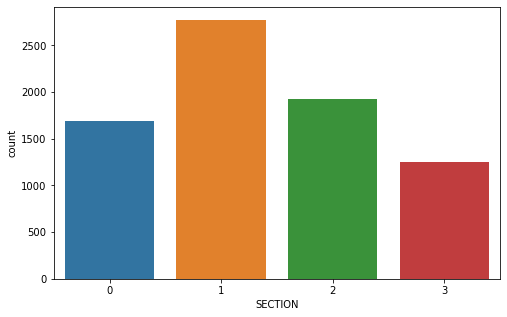

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data_train['SECTION'])

In [8]:
data_train['STORY'].head()

0    But the most painful was the huge reversal in ...
1    How formidable is the opposition alliance amon...
2    Most Asian currencies were trading lower today...
3    If you want to answer any question, click on ‘...
4    In global markets, gold prices edged up today ...
Name: STORY, dtype: object

### Extracting number of characters and numbers of words.

In [9]:
data_train['nwords'] = data_train['STORY'].apply(lambda row: len(row.split()))
data_train['length'] = data_train['STORY'].apply(lambda row: len(row))

In [10]:
data_train.head()

,STORY,SECTION,nwords,length
0,But the most painful was the huge reversal in ...,3,148,843
1,How formidable is the opposition alliance amon...,0,17,129
2,Most Asian currencies were trading lower today...,3,58,386
3,"If you want to answer any question, click on ‘...",1,103,587
4,"In global markets, gold prices edged up today ...",3,46,299


## Checking PDF's for nwords with section as hue

<AxesSubplot:xlabel='SECTION', ylabel='nwords'>

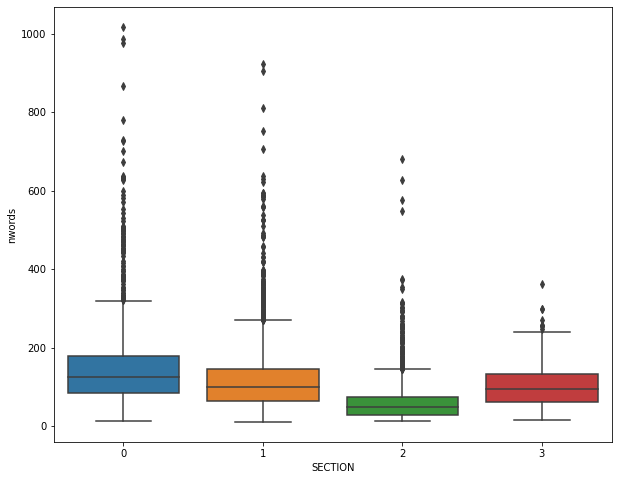

In [11]:
plt.figure(figsize= (10,8))
sns.boxplot(x = data_train['SECTION'], y = data_train['nwords'])

<AxesSubplot:xlabel='SECTION', ylabel='length'>

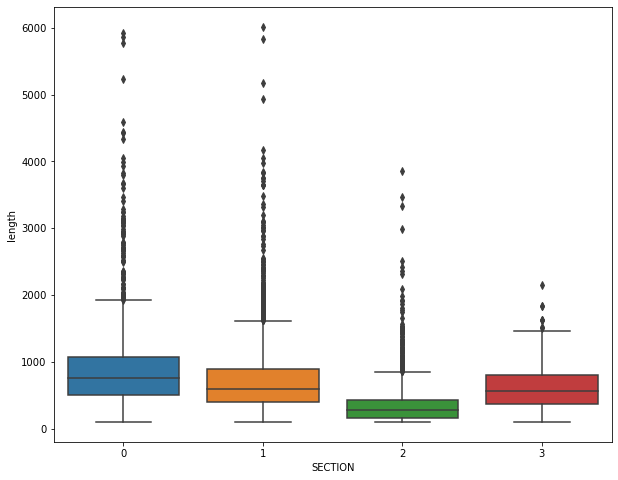

In [12]:
plt.figure(figsize= (10,8))
sns.boxplot(x = data_train['SECTION'], y = data_train['length'])

1. Compared to length, nowords feature can better separate class 0 and 1 on higher values of the feature.
2. Other classes length feature exibits same behavior as nwords. 
3. We can choose to drop length.

#### Create two new features 
1. no. of punctuation
2. no. of stop words


#### using apply

In [13]:
def count_punct_apply(row):
    count = 0
    for char in row: 
        #print(char)
            if char in string.punctuation:
                count = count + 1
            
            
    return count

In [14]:
data_train['STORY'].apply(count_punct_apply)

0       12
1        6
2       31
3       12
4       10
        ..
7623     9
7624     2
7625    10
7626    54
7627    16
Name: STORY, Length: 7628, dtype: int64

In [15]:
punct_re = re.compile(r'[^\w\s]')

In [16]:
data_train['count_punct'] = data_train['STORY'].apply(lambda x:len(punct_re.findall(x)))

In [17]:
data_train.head()

,STORY,SECTION,nwords,length,count_punct
0,But the most painful was the huge reversal in ...,3,148,843,13
1,How formidable is the opposition alliance amon...,0,17,129,6
2,Most Asian currencies were trading lower today...,3,58,386,32
3,"If you want to answer any question, click on ‘...",1,103,587,15
4,"In global markets, gold prices edged up today ...",3,46,299,10


#### using apply and lambda

In [18]:
STOPWORDS = set(stopwords.words('english')+['im','wont','ive'])
def count_stopwords_apply(row):
    count = 0
    for char in row: 
        #print(char)
            if char in STOPWORDS:
                count = count + 1
            
            
    return count

In [19]:
#data_train['STORY'].apply(lambda x: len([i for) i in x.split() if i in STOPWORDS]))
data_train['count_stopwords'] = data_train['STORY'].apply(count_stopwords_apply)

In [20]:
data_train.head()

,STORY,SECTION,nwords,length,count_punct,count_stopwords
0,But the most painful was the huge reversal in ...,3,148,843,13,313
1,How formidable is the opposition alliance amon...,0,17,129,6,48
2,Most Asian currencies were trading lower today...,3,58,386,32,112
3,"If you want to answer any question, click on ‘...",1,103,587,15,193
4,"In global markets, gold prices edged up today ...",3,46,299,10,112


box plot for above these and conclusion

<AxesSubplot:xlabel='SECTION', ylabel='count_stopwords'>

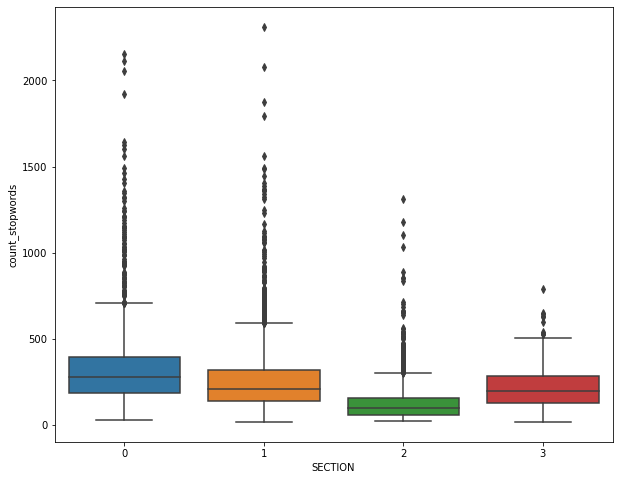

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data_train['SECTION'], y = data_train['count_stopwords'])

### Conclusion:
    1. if data contain above 2500 stopwords we can confidently says that it belong to class 1.
    2. if data contain above 750 there are high chance it wil not belong to class 3.
    3. Class 2 has least overlap with other classes so stopwords, might help a bit in separating class 2 from rest.
    4. if data is more than 1300 than there is high chance it will not belong to class 0 or class 1.
    5. if data is less than 1300 that there is high chance it will belong to class 2 or 3.

<AxesSubplot:xlabel='SECTION', ylabel='count_punct'>

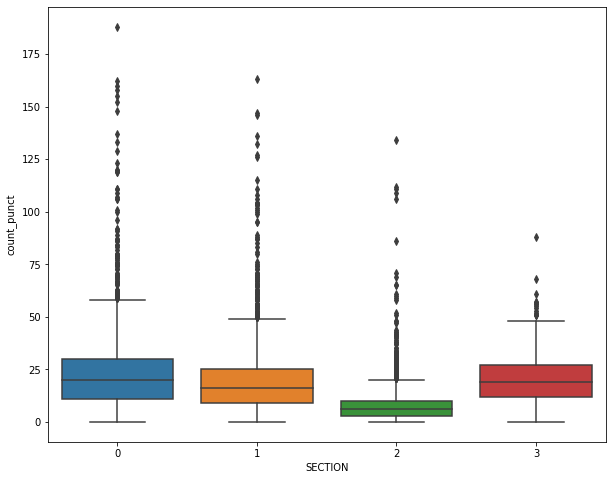

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x = data_train['SECTION'], y = data_train['count_punct'])

### Conclusion:
1. Compared to count_punct, stopwords feature can better separate class 0 and 1 on higher values of the feature.
2. Other classes in count_punct and stopwords are same.

### correlation matrix for numericals features.

In [23]:
corr = data_train.drop(columns = ['SECTION']).corr()
corr

,nwords,length,count_punct,count_stopwords
nwords,1.000000,0.996203,0.904619,0.990376
length,0.996203,1.000000,0.908212,0.996177
count_punct,0.904619,0.908212,1.000000,0.890713
count_stopwords,0.990376,0.996177,0.890713,1.000000


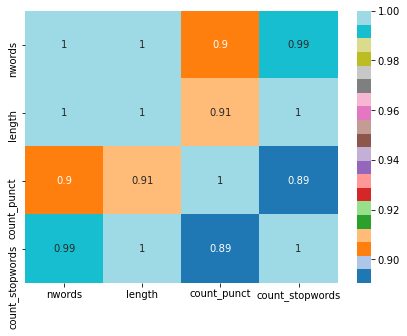

In [24]:
plt.figure(figsize=(7,5))
ax1 = sns.heatmap(data = corr,cmap = "tab20",annot=True)
plt.show()

# Text cleaning

In [25]:
stopwords_custom= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y']

In [26]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    
    pos_tagged_text = nltk.pos_tag(text.split())
    #print(pos_tagged_text)
    
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [27]:
def clean_text(sentence):
    sentence = sentence.lower()
    
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE)
    sentence = re.sub(r'<[^>]*>','',sentence)
    sentence = re.sub(r'\S*@\S*\s?','',sentence)
    sentence = re.sub(r'[-]+',' ',sentence)
    sentence = ' '.join([word for word in sentence.split() if word not in stopwords_custom])
    sentence = re.sub(r'[^\w\s]','',sentence)
    sentence = re.sub(r'[^a-z ]+','',sentence)
    sentence = re.sub(r'\\b[a-z]\\b','', sentence)
    sentence = re.sub(r'[\s]+', ' ',sentence)
    sentence = lemmatize_words(sentence)
    
    return sentence

In [28]:
data_train['clean_story'] = data_train['STORY'].apply(clean_text)

In [29]:
data_train.head()

,STORY,SECTION,nwords,length,count_punct,count_stopwords,clean_story
0,But the most painful was the huge reversal in ...,3,148,843,13,313,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,17,129,6,48,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,58,386,32,112,asian currency trade low today south korean wi...
3,"If you want to answer any question, click on ‘...",1,103,587,15,193,want answer question click answer click answer...
4,"In global markets, gold prices edged up today ...",3,46,299,10,112,global market gold price edge today disappoint...


### remove non eng words

In [30]:
from nltk.corpus import brown

In [31]:
eng_words = set(brown.words())

In [32]:
#eng_words

In [33]:
def remove_non_eng_word(sentence):
    sentence = ' '.join([word for word in sentence.split() if word in eng_words])
    return sentence

#### adding new column which has only english words

In [34]:
data_train['clean_story_eng_only'] = data_train['clean_story'].apply(remove_non_eng_word)

In [35]:
data_train.head()

,STORY,SECTION,nwords,length,count_punct,count_stopwords,clean_story,clean_story_eng_only
0,But the most painful was the huge reversal in ...,3,148,843,13,313,painful huge reversal fee income unheard among...,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,17,129,6,48,formidable opposition alliance among congress ...,formidable opposition alliance among congress
2,Most Asian currencies were trading lower today...,3,58,386,32,112,asian currency trade low today south korean wi...,currency trade low today south win china china...
3,"If you want to answer any question, click on ‘...",1,103,587,15,193,want answer question click answer click answer...,want answer question click answer click answer...
4,"In global markets, gold prices edged up today ...",3,46,299,10,112,global market gold price edge today disappoint...,global market gold price edge today factory ac...


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = data_train.drop(columns = ['SECTION'])
y = data_train['SECTION']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 42,stratify = y)

In [38]:
X_train.shape

(6102, 7)

In [39]:
X_test.shape

(1526, 7)

In [40]:
y_train.value_counts(normalize=True)

1    0.363324
2    0.252212
0    0.221075
3    0.163389
Name: SECTION, dtype: float64

In [41]:
y_test.value_counts(normalize=True)

1    0.363696
2    0.252294
0    0.220839
3    0.163172
Name: SECTION, dtype: float64

# Vectorization

## BOW & TfIdf

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#### BOW

In [43]:
count = CountVectorizer()
X_train_bow = count.fit_transform(X_train['clean_story'])
X_test_bow = count.transform(X_test['clean_story'])


#### TfIdf

In [44]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['clean_story'])
X_test_tfidf = tfidf.transform(X_test['clean_story'])


## w2v

In [45]:
import pickle

glove_path = r'C:\glove_vectors'

with open(glove_path,'rb') as f:
    model = pickle.load(f)
        
glove_words = model.keys()

### Avgw2v clean_story

In [46]:
def avg_w2v(news_article):
    avg_w2v_vectors = []
    for sentence in tqdm(news_article): # for each article/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0 # num of words with a valid vector in the sentence/article
        for word in sentence.split(): # for each word in a article/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [47]:
## vectors avg for words in clean_Story
X_train_avg_w2v = avg_w2v(X_train['clean_story'])

100%|██████████| 6102/6102 [00:01<00:00, 3666.93it/s]


In [48]:
X_test_avg_w2v = avg_w2v(X_test['clean_story'])

100%|██████████| 1526/1526 [00:00<00:00, 2604.24it/s]


### Avgw2v clean_story_eng_only

In [49]:
## vectors avg for words in clean_Story_eng_only
X_train_avg_w2v_eng_only = avg_w2v(X_train['clean_story_eng_only'])

100%|██████████| 6102/6102 [00:02<00:00, 2939.89it/s]


In [50]:
X_test_avg_w2v_eng_only = avg_w2v(X_test['clean_story_eng_only'])

100%|██████████| 1526/1526 [00:00<00:00, 4600.66it/s]


### TFIDFW2v - clean_story

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model_clean_story = TfidfVectorizer()
## idf values for clean_story
tfidf_model_clean_story.fit(X_train['clean_story']) ## using fit we get idf and with transform we get (tf * idf) 
                                                       ## here we're only using fit. for train data we get all idf
# we are converting a dictionary with word as a key, and the idf as a value

dictionary_clean_story = dict(zip(tfidf_model_clean_story.get_feature_names(), list(tfidf_model_clean_story.idf_)))

tfidf_words_clean_story = set(tfidf_model_clean_story.get_feature_names())

In [52]:
def tfidf_w2v(news_article):
    tfidf_w2v_vectors = []
    for sentence in tqdm(news_article): # for each article/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/article
        for word in sentence.split(): # for each word in a article/sentence
            if (word in glove_words) and (word in tfidf_words_clean_story):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary_clean_story[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors


In [53]:
X_train_tfidf_w2v = tfidf_w2v(X_train['clean_story'])

100%|██████████| 6102/6102 [00:08<00:00, 690.25it/s]


In [54]:
X_test_tfidf_w2v = tfidf_w2v(X_test['clean_story'])

100%|██████████| 1526/1526 [00:02<00:00, 711.40it/s]


### TFIDFW2v - clean_story_eng_only

In [55]:
tfidf_model_clean_story_eng_only = TfidfVectorizer()

## idf values for clean_story_eng_only
tfidf_model_clean_story_eng_only.fit(X_train['clean_story_eng_only'])

# we are converting a dictionary with word as a key, and the idf as a value

dictionary_clean_story_eng_only = dict(zip(tfidf_model_clean_story_eng_only.get_feature_names(), list(tfidf_model_clean_story_eng_only.idf_)))

tfidf_words_clean_story_eng_only = set(tfidf_model_clean_story_eng_only.get_feature_names())

In [56]:
X_train_tfidf_w2v_eng_only = tfidf_w2v(X_train['clean_story_eng_only'])

100%|██████████| 6102/6102 [00:08<00:00, 751.50it/s]


In [57]:
X_test_tfidf_w2v_eng_only = tfidf_w2v(X_test['clean_story_eng_only'])

100%|██████████| 1526/1526 [00:01<00:00, 790.79it/s]


# Model building 


#### Choice of metrics : Accuracy as dataset is balanced.
(However we will also look at individual precison and recall)

## Building KNN model for all six vectors.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### BOW KNN

In [59]:
knn_bow =  KNeighborsClassifier()
knn_bow.fit(X_train_bow,y_train)
knn_bow_pred = knn_bow.predict(X_test_bow)
knn_bow_acc =  accuracy_score(y_test , knn_bow_pred)

In [60]:
knn_bow_acc

0.754259501965924

### TfIdf KNN

In [61]:
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(X_train_tfidf,y_train)
knn_tfidf_pred = knn_tfidf.predict(X_test_tfidf)
knn_tfidf_acc = accuracy_score(y_test,knn_tfidf_pred)

In [62]:
knn_tfidf_acc

0.953473132372215

### Avg Word2Vec KNN

In [63]:
knn_avg_w2v = KNeighborsClassifier()
knn_avg_w2v.fit(X_train_avg_w2v,y_train)
knn_avg_w2v_pred = knn_avg_w2v.predict(X_test_avg_w2v)
knn_avg_w2v_acc = accuracy_score(y_test,knn_avg_w2v_pred)

In [64]:
knn_avg_w2v_acc

0.9429882044560943

### Avg Word2Vec eng_only KNN

In [65]:
knn_avg_w2v_eng_only = KNeighborsClassifier()
knn_avg_w2v_eng_only.fit(X_train_avg_w2v_eng_only,y_train)
knn_avg_w2v_eng_only_pred = knn_avg_w2v_eng_only.predict(X_test_avg_w2v_eng_only)
knn_avg_w2v_eng_only_acc = accuracy_score(y_test,knn_avg_w2v_eng_only_pred)

In [66]:
knn_avg_w2v_eng_only_acc

0.9305373525557011

### TfIdf Word2Vec KNN

In [67]:
knn_tfidf_w2v = KNeighborsClassifier()
knn_tfidf_w2v.fit(X_train_tfidf_w2v,y_train)
knn_tfidf_w2v_pred = knn_tfidf_w2v.predict(X_test_tfidf_w2v)
knn_tfidf_w2v_acc = accuracy_score(y_test,knn_tfidf_w2v_pred)

In [68]:
knn_tfidf_w2v_acc

0.936435124508519

### TfIdf Word2Vec eng_only KNN

In [69]:
knn_tfidf_w2v_eng_only = KNeighborsClassifier()
knn_tfidf_w2v_eng_only.fit(X_train_tfidf_w2v_eng_only, y_train)
knn_tfidf_w2v_eng_only_pred = knn_tfidf_w2v_eng_only.predict(X_test_tfidf_w2v_eng_only)
knn_tfidf_w2v_eng_only_acc = accuracy_score(y_test, knn_tfidf_w2v_eng_only_pred)

In [70]:
knn_tfidf_w2v_eng_only_acc

0.919397116644823

## Building Logistic Regression model for all six vectors.

In [71]:
from sklearn.linear_model import LogisticRegression

### BOW LR

In [72]:
lr_bow =  LogisticRegression()
lr_bow.fit(X_train_bow,y_train)
lr_bow_pred = lr_bow.predict(X_test_bow)
lr_bow_acc =  accuracy_score(y_test , lr_bow_pred)

In [73]:
lr_bow_acc

0.963302752293578

### TFIDF LR

In [74]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf,y_train)
lr_tfidf_pred = lr_tfidf.predict(X_test_tfidf)
lr_tfidf_acc = accuracy_score(y_test,lr_tfidf_pred)

In [75]:
lr_tfidf_acc

0.9665792922673656

### Avg Word2Vec LR

In [76]:
lr_avg_w2v = LogisticRegression()
lr_avg_w2v.fit(X_train_avg_w2v,y_train)
lr_avg_w2v_pred = lr_avg_w2v.predict(X_test_avg_w2v)
lr_avg_w2v_acc = accuracy_score(y_test,lr_avg_w2v_pred)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
lr_avg_w2v_acc

0.9515072083879423

### Avg Word2Vec Eng only LR

In [78]:
lr_avg_w2v_eng_only = LogisticRegression()
lr_avg_w2v_eng_only.fit(X_train_avg_w2v_eng_only,y_train)
lr_avg_w2v_eng_only_pred = lr_avg_w2v_eng_only.predict(X_test_avg_w2v_eng_only)
lr_avg_w2v_eng_only_acc = accuracy_score(y_test,lr_avg_w2v_eng_only_pred)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
lr_avg_w2v_eng_only_acc

0.944954128440367

### TFIDF Word2Vec LR

In [80]:
lr_tfidf_w2v = LogisticRegression()
lr_tfidf_w2v.fit(X_train_tfidf_w2v,y_train)
lr_tfidf_w2v_pred = lr_tfidf_w2v.predict(X_test_tfidf_w2v)
lr_tfidf_w2v_acc = accuracy_score(y_test,lr_tfidf_w2v_pred)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
lr_tfidf_w2v_acc

0.9495412844036697

### TFIDF Word2Vec Eng only LR

In [82]:
lr_tfidf_w2v_eng_only = LogisticRegression()
lr_tfidf_w2v_eng_only.fit(X_train_tfidf_w2v_eng_only, y_train)
lr_tfidf_w2v_eng_only_pred = lr_tfidf_w2v_eng_only.predict(X_test_tfidf_w2v_eng_only)
lr_tfidf_w2v_eng_only_acc = accuracy_score(y_test, lr_tfidf_w2v_eng_only_pred)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
lr_tfidf_w2v_eng_only_acc

0.935124508519004

## Performance metrics dataset

In [84]:
data={ 'bow' : [knn_bow_acc,lr_bow_acc], 'tfidf': [knn_tfidf_acc,lr_tfidf_acc], 'avg_w2v': [knn_avg_w2v_acc,lr_avg_w2v_acc],
      'avg_w2v_eng_only': [knn_avg_w2v_eng_only_acc,lr_avg_w2v_eng_only_acc], 
      'tfidf_w2v' : [knn_tfidf_w2v_acc,lr_tfidf_w2v_acc], 'tfidf_w2v_eng_only' : [knn_tfidf_w2v_eng_only_acc,lr_tfidf_w2v_eng_only_acc]}
      
performance_metrics = pd.DataFrame(data, index  = ['KNN','LR'])
           

In [85]:
performance_metrics

,bow,tfidf,avg_w2v,avg_w2v_eng_only,tfidf_w2v,tfidf_w2v_eng_only
KNN,0.754260,0.953473,0.942988,0.930537,0.936435,0.919397
LR,0.963303,0.966579,0.951507,0.944954,0.949541,0.935125


In [86]:
performance_metrics = performance_metrics.assign(max_Acc = lambda x : (x.max(axis = 1)))
performance_metrics

,bow,tfidf,avg_w2v,avg_w2v_eng_only,tfidf_w2v,tfidf_w2v_eng_only,max_Acc
KNN,0.754260,0.953473,0.942988,0.930537,0.936435,0.919397,0.953473
LR,0.963303,0.966579,0.951507,0.944954,0.949541,0.935125,0.966579


## Hyper parameter tuning for KNN TFIDF

#### Gridsearch CV

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
knn_tfidf_cv = KNeighborsClassifier()
param_grid_knn = {'n_neighbors':[3, 5,9,15,23,35,67],'weights':['uniform','distance']}

knn_search = GridSearchCV(estimator=knn_tfidf_cv,param_grid=param_grid_knn,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)

knn_search.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 9, 15, 23, 35, 67],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [89]:
knn_search.best_score_

0.9478896631355648

In [90]:
knn_search.best_params_

{'n_neighbors': 35, 'weights': 'distance'}

In [91]:
param_grid_knn = {'n_neighbors':[30,31,32,33,34,35,36,37,38,39,40],'weights':['uniform','distance']}

knn_search = GridSearchCV(estimator=knn_tfidf,param_grid=param_grid_knn,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)

knn_search.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                         40],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [92]:
knn_search.best_score_

0.9495284703481424

In [93]:
knn_search.best_params_

{'n_neighbors': 31, 'weights': 'distance'}

## Hyperparameter tuning for LR tfidf

In [94]:
lr_tfidf_cv = LogisticRegression()
param_grid_lr = { 'C' : [900,950,1000,1100,1150,1200],
     'penalty' : ['l1', 'l2']}

lr_search = GridSearchCV(estimator=lr_tfidf_cv, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=5)

lr_search.fit(X_train_tfidf,y_train)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97476457        nan 0.97427277        nan 0.97460077
        nan 0.97394517        nan 0.97394503        nan 0.97443697]
  warnings.warn(
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [900, 950, 1000, 1100, 1150, 1200],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [95]:
lr_search.best_params_

{'C': 900, 'penalty': 'l2'}

In [96]:
lr_search.best_score_

0.9747645708301447

In [97]:
#best model
lr_search.best_estimator_

LogisticRegression(C=900)

In [98]:
best_model = LogisticRegression(C = 900 , penalty = 'l2')
best_model

LogisticRegression(C=900)

## Generating predictions on test data

In [99]:
data_test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [100]:
data_test['clean_story'] = data_test['STORY'].apply(clean_text)

In [101]:
data_test.head()

,STORY,clean_story
0,2019 will see gadgets like gaming smartphones ...,see gadget like game smartphones wearable medi...
1,It has also unleashed a wave of changes in the...,also unleashed wave change mcu make sure futur...
2,It can be confusing to pick the right smartpho...,confuse pick right smartphone yourself segrega...
3,The mobile application is integrated with a da...,mobile application integrate dashboard confirm...
4,We have rounded up some of the gadgets that sh...,round gadget show left indelible mark on consu...


In [102]:
tfidf_data_test = tfidf.transform(data_test['clean_story'])

In [103]:
data_test_pred = lr_search.best_estimator_.predict(tfidf_data_test)

In [104]:
data_test_pred

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [105]:
data_test_pred_df = pd.DataFrame(data_test_pred,columns = ['SECTION'])

In [106]:
data_test_pred_df.to_excel('News_Category_Prediction.xlsx',index = False)

In [107]:
data_test_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   SECTION  2748 non-null   int64
dtypes: int64(1)
memory usage: 21.6 KB


In [108]:
data_test.shape

(2748, 2)

In [109]:
len(data_test_pred_df)

2748